In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Histograms and Boxplots

Wyoming has the lowest urbanization index on average (Article: https://fivethirtyeight.com/features/how-urban-or-rural-is-your-state-and-what-does-that-mean-for-the-2020-election/).

In [22]:
urban = pd.read_csv('Data/Urbanization Data.txt')

In [23]:
urban.head()

,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex
0,1,Alabama,G0100010020100,32.47718,-86.49007,1845,44076.0,10.69367
1,1,Alabama,G0100010020200,32.47425,-86.47337,2172,43008.0,10.66914
2,1,Alabama,G0100010020300,32.47543,-86.46019,3385,38987.0,10.57098
3,1,Alabama,G0100010020400,32.47200,-86.44363,4267,43131.0,10.67200
4,1,Alabama,G0100010020500,32.45883,-86.42266,9965,43131.0,10.67200


In [24]:
wyoming = urban[urban['state'] == 'Wyoming']

In [25]:
wy_ui = wyoming['urbanindex']

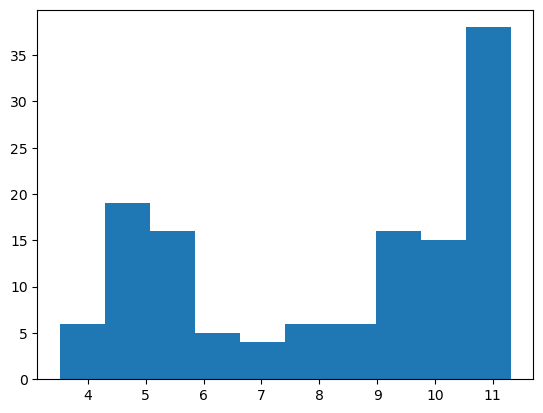

In [26]:
plt.hist(wy_ui)
plt.show()

Our attempt to clean up the plot is below. The best way to explore what something does is to delete it or comment it out and see what changes.

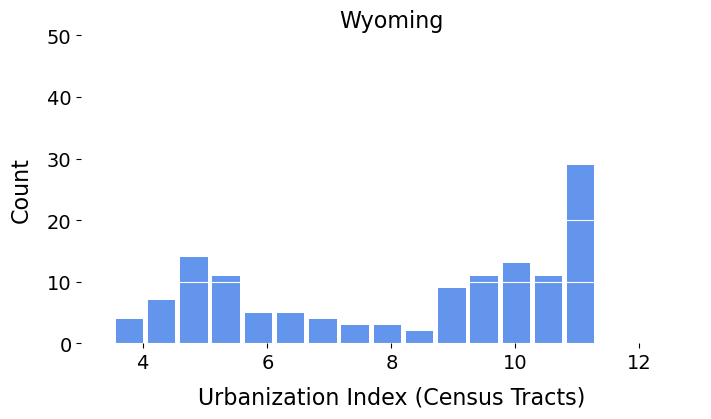

In [27]:
LABEL_SIZE = 16
TICK_SIZE = 14
n_bins = 15

plt.figure(figsize = [8,4])
# 'rwidth' sets the width of the bars.
# 'bins' sets the number of bars.
plt.hist(wy_ui, rwidth = 0.85, bins = n_bins, color = 'cornflowerblue')
# Set the tick params.
plt.tick_params(labelsize = TICK_SIZE)
# 'plt.grid()' sets lines for y-axis values.
plt.grid(axis = 'y',color= 'white')
# Give x-axis and y-axis labels.
plt.xlabel('Urbanization Index (Census Tracts)', fontsize = LABEL_SIZE, labelpad = 10)
plt.ylabel('Count', fontsize = LABEL_SIZE, labelpad = 10)
# Get rid of the spines.
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
# Set x-axis and y-axis values of the range.
ax.set_xlim([3,13])
ax.set_ylim([0,50])
# Give a title.
plt.title('Wyoming', fontsize = LABEL_SIZE)
plt.show()

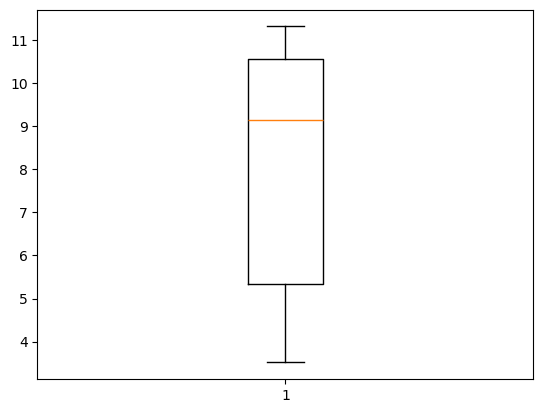

In [28]:
# Make a box plot
plt.boxplot(wy_ui)
plt.show()

Our first attempt to clean up the plot is below. The best way to explore what something does is to delete it or comment it out and see what changes.

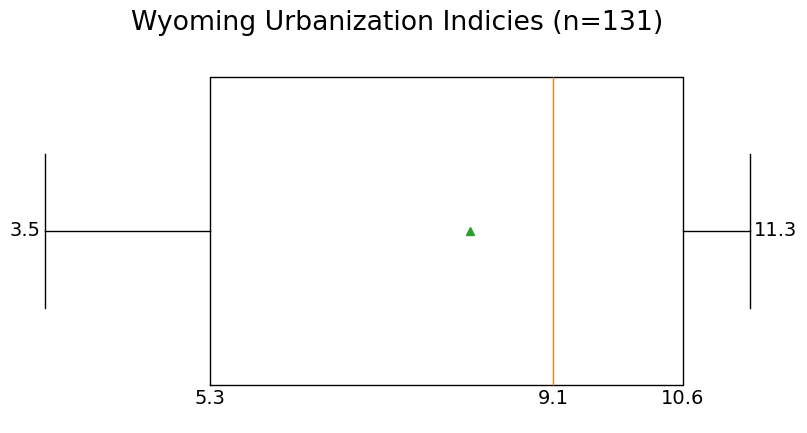

In [29]:
plt.figure(figsize = [10,5])
# 'vert' makes the graph vertical.
# 'showmeans' shows the mean value.
plt.boxplot(wy_ui, vert = False, showmeans=True, widths=0.8)
# Get rid of the spines.
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
# Get rid of the ticks.
plt.xticks([])
plt.yticks([])
# Show the texts for average, quartiles, min, and max.
m,q1,q2,q3,x = np.quantile(wy_ui,q=[0,0.25,0.5,0.75,1])
for item in q1,q2,q3:
    plt.text(item, 0.55, f'{item:.1f}', fontsize = TICK_SIZE, ha = 'center')
plt.text(0, 0.5, f'{m:.1f}', fontsize = TICK_SIZE, transform = ax.transAxes, va = 'center')
plt.text(0.96, 0.5, f'{x:.1f}', fontsize = TICK_SIZE, transform = ax.transAxes, va = 'center')
# Give a title.
plt.title(label = 'Wyoming Urbanization Indicies (n=131)',fontsize = LABEL_SIZE*1.2)
plt.show()

## Using subplots

In [30]:
# Subplots example

Text(0.5, 0, 'The data')

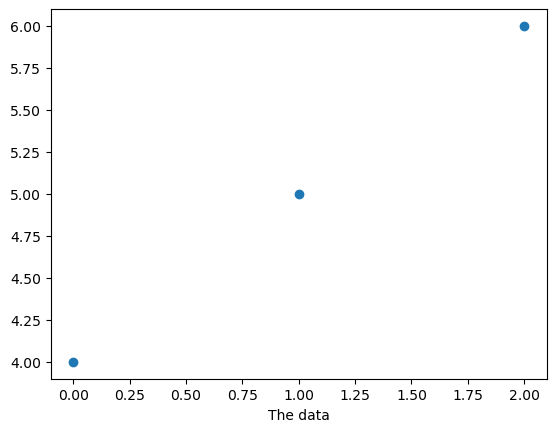

In [31]:
plt.scatter([0,1,2],[4,5,6])
plt.xlabel('The data')

(<Figure size 1000x600 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

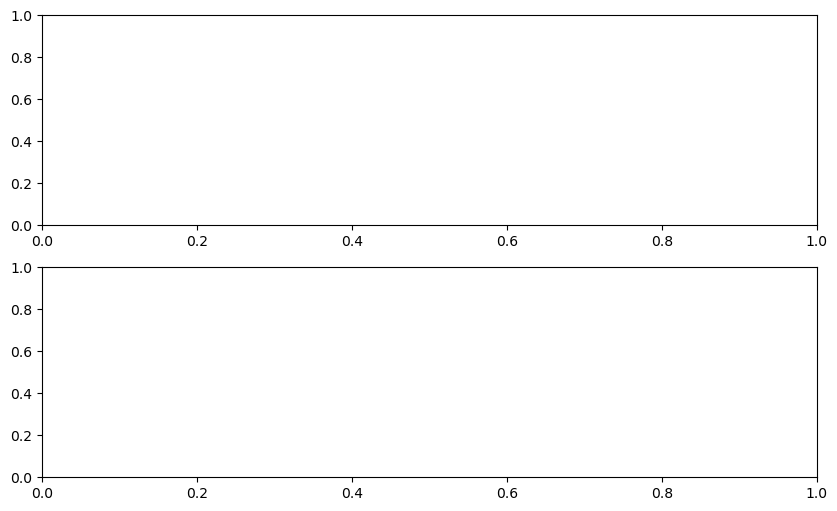

In [32]:
# Create two sub-plots.
plt.subplots(2, figsize = (10,6))

Here is our first try at putting our histogram and boxplot together.

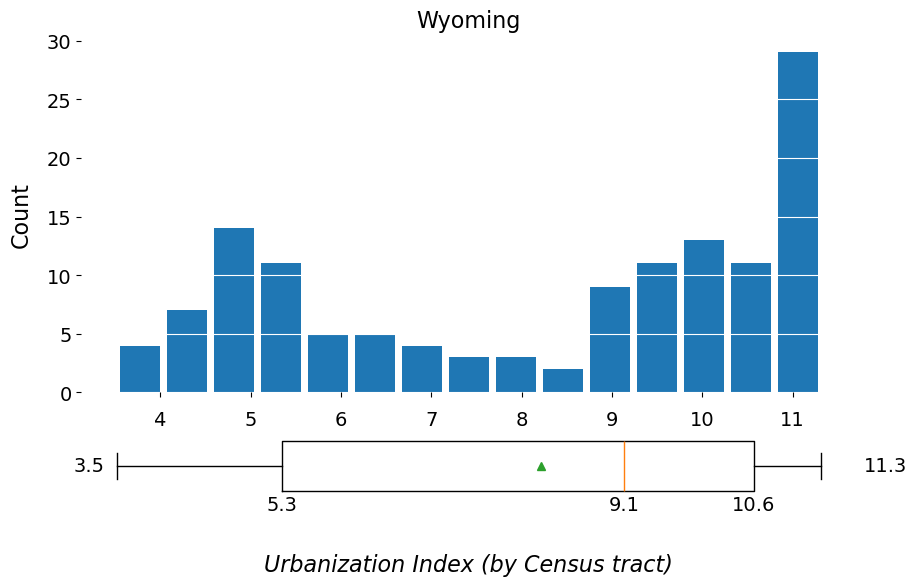

In [33]:
f,[ax_hist,ax_box] = plt.subplots(2, 1, figsize = (10,6), sharex = True, 
                                  gridspec_kw={'height_ratios':[0.85, 0.15]})

# Constants and params
LABEL_SIZE = 16
TICK_SIZE = 14
n_bins = 15

# Histogram
ax_hist.hist(wy_ui, rwidth = 0.85, bins = n_bins)
[ax_hist.spines[i].set_visible(False) for i in ax_hist.spines]
ax_hist.tick_params(labelsize = TICK_SIZE)
ax_hist.grid(axis = 'y',color= 'white')
# ax_hist.set_xlabel('Urbanization Index (Census Tracts)', fontsize = LABEL_SIZE, labelpad = 10)
ax_hist.set_ylabel('Count', fontsize = LABEL_SIZE, labelpad = 10)
ax_hist.set_title('Wyoming', fontsize = LABEL_SIZE)

# Box plot
ax_box.boxplot(wy_ui, vert = False, showmeans=True, widths = 0.8)
[ax_box.spines[i].set_visible(False) for i in ax_box.spines]
ax_box.set_yticks([])
# Put the ticks in between two graphs.
ax_box.xaxis.tick_top() # Keep this for later
ax_box.tick_params(axis = 'x', size = 0, labelsize = TICK_SIZE)
m,q1,q2,q3,x = np.quantile(wy_ui,q=[0,0.25,0.5,0.75,1])
for item in q1,q2,q3:
    ax_box.text(item,0.3,f'{item:.1f}', horizontalalignment = 'center', fontsize = TICK_SIZE)
ax_box.text(-0.01,0.5,f'{m:.1f}',transform = ax_box.transAxes, fontsize = TICK_SIZE, va = 'center')
ax_box.text(1.01,0.5,f'{x:.1f}',transform = ax_box.transAxes, fontsize = TICK_SIZE, va = 'center')

# Set a common x-axis label now.
ax_box.set_xlabel('Urbanization Index (by Census tract)', fontsize = LABEL_SIZE, labelpad = 40,
                 style = 'italic')
plt.savefig('Images/Univariate.png', bbox_inches = 'tight')
plt.show()

## Comparing across categories with seaborn

We also have summary data by state. How do average urbanization indices vary by census-designated region of the United States? Are some regions more urban and others more rural? Is there a large variation between states in the region?

In [34]:
urb_by_state = pd.read_csv('Data/Urban Census Data.csv')
urb_by_state.head(2)

,state,urbanindex,census_region
0,Alabama,9.605935,South
1,Alaska,8.735964,West


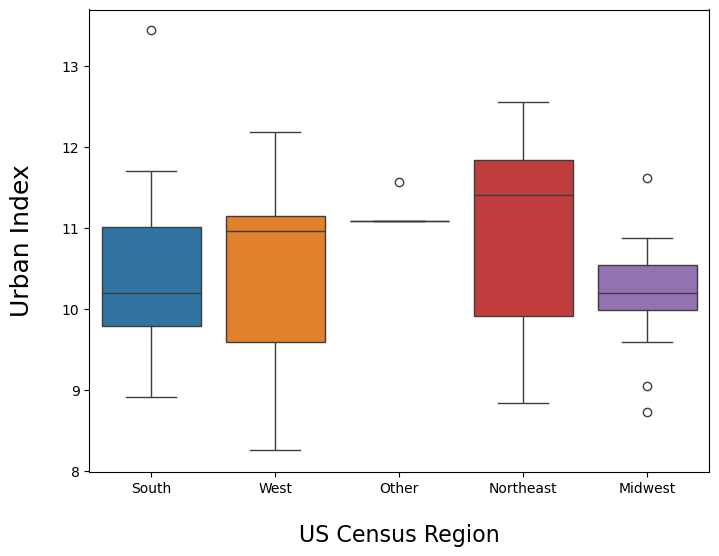

In [35]:
# Seaborn box plots
import seaborn as sns
plt.figure(figsize = [8,6])
sns.boxplot(data = urb_by_state, x = 'census_region', y = 'urbanindex', hue='census_region')
ax = plt.gca()
ax.set_xlabel('US Census Region', fontsize = 16, labelpad = 20)
ax.set_ylabel('Urban Index', fontsize = 18, labelpad = 20)
plt.show()

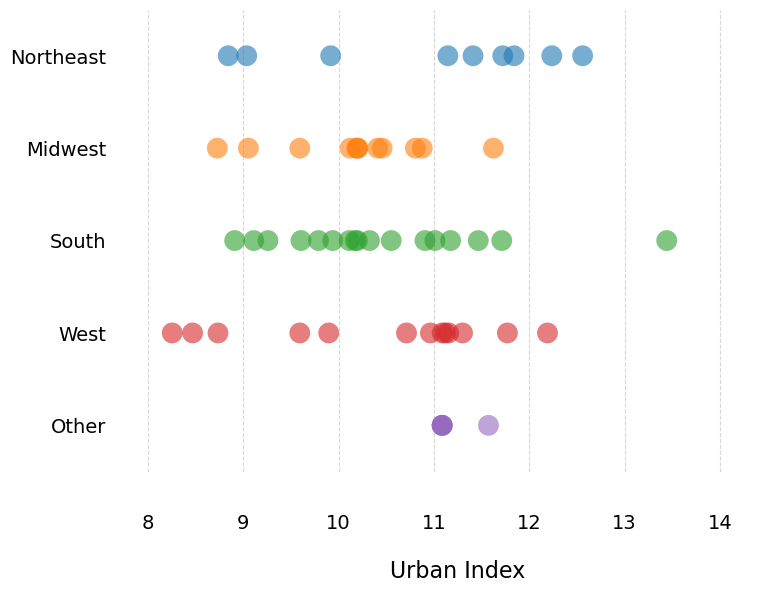

In [36]:
# Better strip chart
plt.figure(figsize = [8,6])
urb_by_state['census_region'] = pd.Categorical(values = urb_by_state['census_region'],ordered = True, 
                                               categories=['Northeast', 'Midwest', 'South', 'West', 'Other'])
sns.stripplot(data = urb_by_state, y = 'census_region', x = 'urbanindex', orient = 'h', jitter = False, s = 15,
             alpha = 0.6, hue = 'census_region')
# Gid rid of the spines.
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
# Set x-axis limit.
ax.set_xlim([8,14.5])
# Create lines for x-axis values.
ax.grid(axis = 'x', linestyle = '--', alpha = 0.5)
ax.tick_params(size = 0, labelsize = TICK_SIZE, pad = 30)
# Give x-axis and y-axis labels.
ax.set_ylabel('')
ax.set_xlabel('Urban Index', fontsize = 16, labelpad = 20)
# We could add text over to the right
plt.show()